# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = [] #this is where we pull the coordinates
cities = [] #we are using the coordinates to loop to the list of cities

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#the output changes everytime we have the np.radom unit form, it is randomizes the results so it will change

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#this is the link we use to pull weather information, after ? we will hava parameters
url = 'http://api.openweathermap.org/data/2.5/weather?' 

#build query URL
#"appid" is the application id, this is our API after the url 
#"&q=" is the query - extensions of the URL help determine specific content or action based on the data being delivered
#in this case our query is the city
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f2deb80b0bea75908cebab9ed8582510&units=imperial&q=


In [26]:
#get weather data
#we turn it into a json format
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [27]:
# counter = 1 #can be used for the cities, 
# for i in range(len(cities)):
#     query_url = url + "appid=" + weather_api_key + "&q=" + cities[i] + '&units=imperial' # Build query URL, imperial units
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()
    
#     #if weather_response['cod'] != '404': #to eliminate city names that aren't found with Citipy
#     print('City Number: ' + str(counter) + ' | City Name: ' + weather_json.get('name'))
#     print('Requested URL: ' + str(query_url))
#     print('-----------------------------------')
#     counter += 1
#     weather_response['city'][weather_response['city'].index[i]] = weather_json.get('name')

#create a for loop that will through request made
#append the values trying to retrived from said list

#creating empty lists for every item in our query 
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = [] 
country = []

x = 0

print('Beginning Data Retrieval')
print("-"*25)
for i in cities:
    try:
        weather_response = requests.get(query_url + i).json() #each city that is in my cities list
        x = x + 1
        print(f'Processing Record {x} | {i}')
        city_name.append(weather_response["name"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        temperature.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
    except KeyError:
        print("City not found")
    

Beginning Data Retrieval
-------------------------
Processing Record 1 | novotroitskaya
Processing Record 2 | bathsheba
Processing Record 3 | nguiu
City not found
Processing Record 4 | albany
Processing Record 5 | saint-philippe
Processing Record 6 | conceicao do araguaia
Processing Record 7 | taolanaro
City not found
Processing Record 8 | barentsburg
City not found
Processing Record 9 | cape town
Processing Record 10 | mataura
Processing Record 11 | port alfred
Processing Record 12 | ponta do sol
Processing Record 13 | kavieng
Processing Record 14 | moerai
Processing Record 15 | hobart
Processing Record 16 | atuona
Processing Record 17 | khani
Processing Record 18 | kwinana
Processing Record 19 | nome
Processing Record 20 | nizhneyansk
City not found
Processing Record 21 | coihaique
Processing Record 22 | shimoda
Processing Record 23 | punta arenas
Processing Record 24 | lata
Processing Record 25 | butaritari
Processing Record 26 | camacha
Processing Record 27 | novyy urengoy
Processi

Processing Record 239 | lannion
Processing Record 240 | taltal
Processing Record 241 | korla
Processing Record 242 | alofi
Processing Record 243 | pinhao
Processing Record 244 | guerrero negro
Processing Record 245 | san martin
Processing Record 246 | porto novo
Processing Record 247 | qaqortoq
Processing Record 248 | bodden town
Processing Record 249 | lahti
Processing Record 250 | rathkeale
Processing Record 251 | namatanai
Processing Record 252 | ahipara
Processing Record 253 | sorland
Processing Record 254 | hasaki
Processing Record 255 | lamu
Processing Record 256 | bundibugyo
Processing Record 257 | attawapiskat
City not found
Processing Record 258 | la ronge
Processing Record 259 | ensenada
Processing Record 260 | vaitupu
City not found
Processing Record 261 | abu kamal
Processing Record 262 | rio grande
Processing Record 263 | sao felix do xingu
Processing Record 264 | chuy
Processing Record 265 | saldanha
Processing Record 266 | grindavik
Processing Record 267 | mehamn
Process

Processing Record 477 | dunedin
Processing Record 478 | hambantota
Processing Record 479 | lima
Processing Record 480 | bay roberts
Processing Record 481 | maceio
Processing Record 482 | vodnyy
Processing Record 483 | nioro
Processing Record 484 | martapura
Processing Record 485 | cuicatlan
Processing Record 486 | bergama
Processing Record 487 | lamont
Processing Record 488 | ponta delgada
Processing Record 489 | hervey bay
Processing Record 490 | port-gentil
Processing Record 491 | mananjary
Processing Record 492 | bawku
Processing Record 493 | mahajanga
Processing Record 494 | dongsheng
Processing Record 495 | tshikapa
Processing Record 496 | saint-denis
Processing Record 497 | rock springs
Processing Record 498 | oksfjord
Processing Record 499 | kruisfontein
Processing Record 500 | san andres
Processing Record 501 | pombia
Processing Record 502 | bondo
Processing Record 503 | gallup
Processing Record 504 | soderhamn
Processing Record 505 | pangkalanbuun
Processing Record 506 | honia

In [7]:
# retrieved_items = pd.DataFrame({
#     "City": city_name,
#     "Lat": latitude,
#     "Lng": longitude,
#     "Max Temp" : temperature,
#     "Humidity" : humidity,
#     "Cloudiness" : cloudiness,
#     "Wind Speed (mph)": wind_speed,
#     "Country": country
# })
# retrieved_items.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

#convert raw data to DataFrame
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": thistime
})
weather_df.head(10)


11/22/2020


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Novotroitskaya,45.33,41.53,30.00,100,90,11.18,RU,11/22/2020
1,Bathsheba,13.22,-59.52,80.60,78,40,14.99,BB,11/22/2020
2,Albany,42.60,-73.97,39.00,67,100,1.99,US,11/22/2020
3,Saint-Philippe,-21.36,55.77,73.40,73,86,11.41,RE,11/22/2020
4,Conceição do Araguaia,-8.26,-49.26,73.20,94,100,1.68,BR,11/22/2020
5,Cape Town,-33.93,18.42,64.00,82,20,10.29,ZA,11/22/2020
6,Mataura,-46.19,168.86,55.99,63,23,4.00,NZ,11/22/2020
7,Port Alfred,-33.59,26.89,66.43,86,100,8.72,ZA,11/22/2020
8,Ponta do Sol,32.67,-17.10,66.20,72,20,8.05,PT,11/22/2020
9,Kavieng,-2.57,150.80,84.04,66,67,10.02,PG,11/22/2020


In [78]:
#export data to csv
weather_df.to_csv('weather_data_output.csv')

#visualize to confirm airport data appears
#weather_df.sort_values('weather_data_output', ascending=False)

In [79]:
#summary of central tendency of dataset
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,18.158250,13.241607,55.702125,74.923214,53.860714,7.738429
std,34.013901,90.501280,24.114407,18.357886,38.552270,5.116671
min,-54.800000,-175.200000,-25.010000,10.000000,0.000000,0.310000
25%,-9.115000,-68.307500,39.000000,67.000000,18.000000,3.990000
50%,21.140000,16.275000,62.325000,78.500000,64.500000,6.930000
75%,45.800000,86.697500,75.200000,88.000000,90.000000,10.290000
max,78.220000,178.420000,91.400000,100.000000,100.000000,44.740000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
list(weather_df.columns)

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed (mph)',
 'Country']

In [80]:
#check for cities with humidity over 100%
weather_df.loc[weather_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date


In [81]:
#check that above code works by pulling humidity over 100%
weather_df.loc[weather_df['Humidity'] < 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date
1,Bathsheba,13.22,-59.52,80.60,78,40,14.99,BB,11/22/2020
2,Albany,42.60,-73.97,39.00,67,100,1.99,US,11/22/2020
3,Saint-Philippe,-21.36,55.77,73.40,73,86,11.41,RE,11/22/2020
4,Conceição do Araguaia,-8.26,-49.26,73.20,94,100,1.68,BR,11/22/2020
5,Cape Town,-33.93,18.42,64.00,82,20,10.29,ZA,11/22/2020
...,...,...,...,...,...,...,...,...,...
555,Muros,42.78,-9.06,46.00,93,0,4.79,ES,11/22/2020
556,Pontes e Lacerda,-15.23,-59.34,86.76,36,77,3.02,BR,11/22/2020
557,Rawson,-43.30,-65.10,71.31,34,0,18.21,AR,11/22/2020
558,Sabha,27.04,14.43,62.37,31,45,12.66,LY,11/22/2020


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

11/22/2020


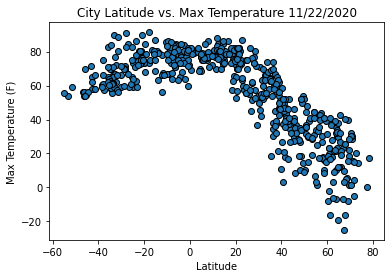

In [84]:
# displaying today's date by using datetime syntax 
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')


# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Latitude_vs_Temperature.jpg')

## Latitude vs. Humidity Plot

11/22/2020


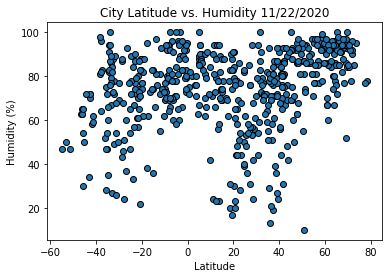

In [85]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Latitude_vs_Humidity.jpg')

## Latitude vs. Cloudiness Plot

11/22/2020


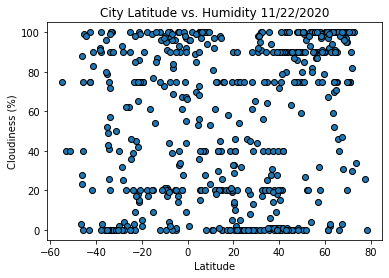

In [86]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Latitude_vs_cloudiness.jpg')

## Latitude vs. Wind Speed Plot

11/22/2020


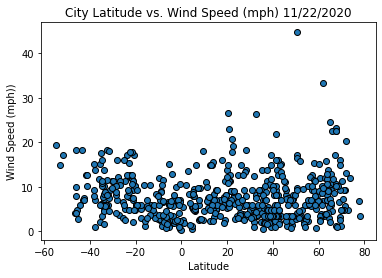

In [87]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph) ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.savefig('Latitude_vs_wind_speed.jpg')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
#create a new dataframe with northern hemisphere only
north_df = weather_df.loc[weather_df['Lat'] >= 0]
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country
0,Novotroitskaya,45.33,41.53,30.00,100,90,11.18,RU
1,Bathsheba,13.22,-59.52,80.60,78,40,14.99,BB
2,Albany,42.60,-73.97,39.00,67,100,1.99,US
8,Ponta do Sol,32.67,-17.10,66.20,72,20,8.05,PT
13,Khani,41.96,42.96,42.80,87,90,13.87,GE
...,...,...,...,...,...,...,...,...
552,Oistins,13.07,-59.53,80.60,78,40,14.99,BB
553,Toropets,56.50,31.64,35.42,97,100,7.11,RU
554,Nālūt,30.33,10.85,49.95,79,44,2.93,LY
555,Muros,42.78,-9.06,46.00,93,0,4.79,ES


The r-value is -0.86


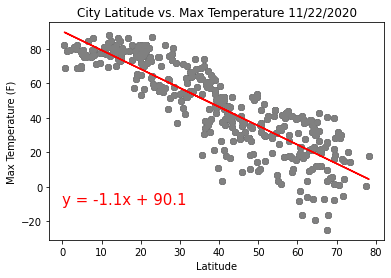

<Figure size 432x288 with 0 Axes>

In [88]:
x_axis = north_df['Lat']
y_axis = north_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_temperature.jpg')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
#create a new dataframe with southern hemisphere only
south_df = weather_df.loc[weather_df['Lat'] <= 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country
3,Saint-Philippe,-21.36,55.77,73.40,73,86,11.41,RE
4,Conceição do Araguaia,-8.26,-49.26,73.20,94,100,1.68,BR
5,Cape Town,-33.93,18.42,64.00,82,20,10.29,ZA
6,Mataura,-46.19,168.86,55.99,63,23,4.00,NZ
7,Port Alfred,-33.59,26.89,66.43,86,100,8.72,ZA
...,...,...,...,...,...,...,...,...
546,Labuhan,-6.88,112.21,80.04,78,99,4.56,ID
547,Kupang,-10.17,123.58,83.41,73,97,8.01,ID
556,Pontes e Lacerda,-15.23,-59.34,86.76,36,77,3.02,BR
557,Rawson,-43.30,-65.10,71.31,34,0,18.21,AR


The r-value is 0.57


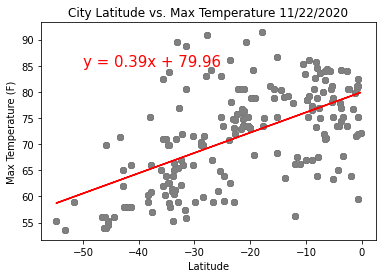

<Figure size 432x288 with 0 Axes>

In [89]:
x_axis = south_df['Lat']
y_axis = south_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_temperature.jpg')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.34


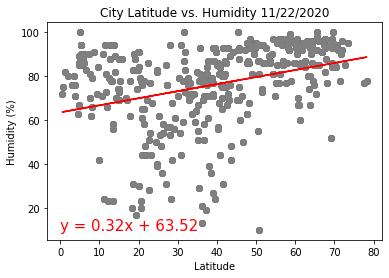

<Figure size 432x288 with 0 Axes>

In [90]:
x_axis = north_df['Lat']
y_axis = north_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_humidity.jpg')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.39


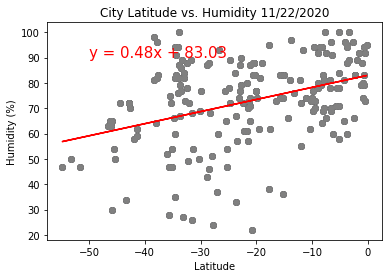

<Figure size 432x288 with 0 Axes>

In [91]:
x_axis = south_df['Lat']
y_axis = south_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_humidity.jpg')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

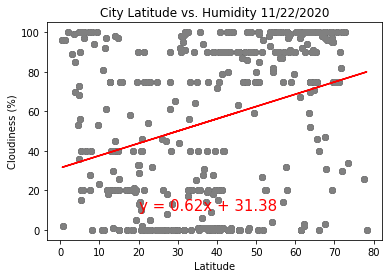

<Figure size 432x288 with 0 Axes>

In [92]:
x_axis = north_df['Lat']
y_axis = north_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_cloudiness.jpg')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

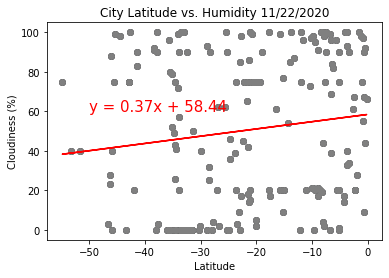

<Figure size 432x288 with 0 Axes>

In [93]:
x_axis = south_df['Lat']
y_axis = south_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_cloudiness.jpg')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

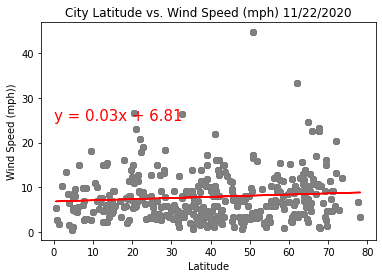

<Figure size 432x288 with 0 Axes>

In [94]:
x_axis = north_df['Lat']
y_axis = north_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph) ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_wind_speed.jpg')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

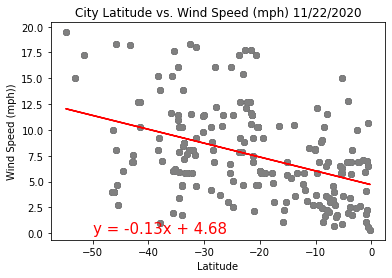

<Figure size 432x288 with 0 Axes>

In [95]:
x_axis = south_df['Lat']
y_axis = south_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph) ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, facecolor='grey')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_wind_speed.jpg')